# 事前準備

In [1]:
# Initializing
from google.colab import drive

drive.mount('/content/drive')
# Define constant value
RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"

Mounted at /content/drive


# STFTの手順
音声信号のある時間範囲を窓で区切ってフーリエ変換して、その時間範囲の周波数スペクトルを計算します。
窓をずらしながら繰り返すことで、周波数スペクトルの時間経過の行列Dが得られます。
## STFTの主なパラメータ
n_fft（窓の長さ）
デフォルト値は2048

hop_length（窓の移動幅）
デフォルト値はn_fft/4


### 参考文献


音声ファイル特徴量変換（その1）STFT
https://work-in-progress.hatenablog.com/entry/2020/02/22/155653

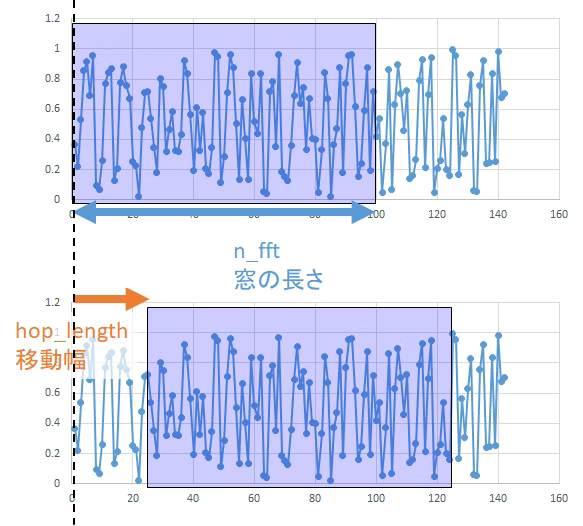

# 動作テスト

Audio wave shape: (31471,)


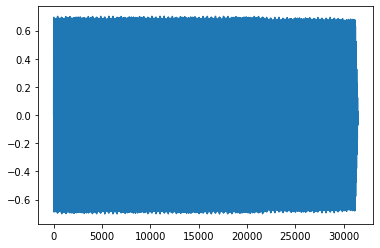


FFT後の配列は虚数配列になっている。
print("FFTized wave raw output:

[3.5258759 -2.93098879e-14j 3.50991475+7.49212664e-02j
 3.44640117-1.96551071e-01j ... 4.01324284+4.53411996e-02j
 3.44640117+1.96551071e-01j 3.50991475-7.49212664e-02j]

虚数は実数空間にプロットできない。
虚数の距離がほしいので、ユークリッド距離を用いて算出。

Audio freq shape:


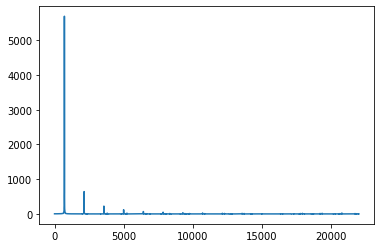

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import librosa
%matplotlib inline

audio_path="/content/drive/MyDrive/Colab Notebooks/BachelorResearch/beep-01a.wav"
raw, sr = librosa.load(audio_path, sr=44000)
print("Audio wave shape:", raw.shape)
plt.plot(raw)
plt.show()


F = np.fft.fft(raw)

print("""
FFT後の配列は虚数配列になっている。
print("FFTized wave raw output:
""")
print(F)

print("""
虚数は実数空間にプロットできない。
虚数の距離がほしいので、ユークリッド距離を用いて算出。
""")
amp = np.abs(F)

print("Audio freq shape:")
freq = np.linspace(0, sr, sr)
plt.plot(freq[:int(sr/2)+1], amp[:int(sr/2)+1])
plt.show()

# FFT変換をするコード

## 使用ディレクトリの存在確認と作成

In [3]:
import os
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q1"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q1")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q2"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q2")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q3"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q3")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q4"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/fft/Q4")

In [4]:
import os
import pathlib

def audio_fft(filepath, savemode): # if savemode is true, not show figure, but save into a file.  
  raw, sr = librosa.load(filepath, sr=44100)
  F = np.abs(np.fft.fft(raw))

  if savemode:
    fig = plt.figure()
    freq = np.linspace(0, sr, sr)
    plt.plot(freq[:int(sr/2)+1], F[:int(sr/2)+1])
    dirs = filepath.split("/")
    output_path_str = ""
    for i in range(len(dirs)):
      if not i == len(dirs) - 2:
        output_path_str = output_path_str  + dirs[i] + '/'
      else :
        output_path_str = output_path_str  + "fft/" + dirs[i] + '/'
    output_path = pathlib.Path(output_path_str)
    fig.savefig(output_path.with_suffix(".png"))
    plt.close()


  else:
    print(filepath)
    plt.plot(F)
    plt.show()

def path_to_audiofiles(dir_folder):
    list_of_audio = []
    for file in os.listdir(dir_folder):
        if file.endswith(".wav"):
            directory = "%s%s" % (dir_folder, file)
            list_of_audio.append(directory)
    return list_of_audio

Q1_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q1/"
Q2_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q2/"
Q3_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q3/"
Q4_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q4/"

for audio in path_to_audiofiles(Q1_2s):
  audio_fft(audio, True)
for audio in path_to_audiofiles(Q2_2s):
  audio_fft(audio, True)
for audio in path_to_audiofiles(Q3_2s):
  audio_fft(audio, True)
for audio in path_to_audiofiles(Q4_2s):
  audio_fft(audio, True)


KeyboardInterrupt: ignored